# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to /Users/Dips-
[nltk_data]     Bootcamp/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = os.getenv("NEWS_API_KEY")
api_key = "87b323153c7f4b07a9c2ff272252b9ac"

##somehow the NEWS_API_KEY was not readable even though .env file was in the same folder. Hence, the temp arrangement. 

In [8]:
# Create a newsapi client
# YOUR CODE HERE!

from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [10]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compuond = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiments.append({
            "text":text,
            "Compuond":compuond,
            "Positive":pos,
            "Negative":neg,
            "Neutral":neu
        })
    
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc.head()

,text,Compuond,Positive,Negative,Neutral
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
4,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816


In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compuond = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiments.append({
            "text":text,
            "Compuond":compuond,
            "Positive":pos,
            "Negative":neg,
            "Neutral":neu
        })
    
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head()

,text,Compuond,Positive,Negative,Neutral
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
3,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966
4,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc.describe()


,Compuond,Positive,Negative,Neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.405365,0.101000,0.01570,0.883350
std,0.291849,0.071447,0.02815,0.082046
min,0.000000,0.000000,0.00000,0.773000
25%,0.193950,0.052000,0.00000,0.821000
50%,0.401650,0.094500,0.00000,0.848500
75%,0.708275,0.163250,0.01250,0.948000
max,0.845500,0.217000,0.07100,1.000000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth.describe()


,Compuond,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.128900,0.046800,0.011200,0.942000
std,0.304466,0.059529,0.036611,0.070125
min,-0.401900,0.000000,0.000000,0.778000
25%,0.000000,0.000000,0.000000,0.917750
50%,0.012900,0.036000,0.000000,0.958000
75%,0.254725,0.074500,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words("english")

# Expand the default stopwords list if necessary
stop.append("...")


In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
     # Remove the stop words
    words = [word for word in words if word not in stop]
    
    # Remove the punctuation from text
    words = [word for word in words if word not in punctuation]
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
      
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

btc['tokens'] = btc['text'].apply(tokenizer)
btc.head()

,text,Compuond,Positive,Negative,Neutral,tokens
0,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[share, square, 6, today, american, fintech, c..."
2,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000,"[tesla, ’, relationship, bitcoin, dalliance, a..."
3,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
4,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, stopped, accepting, bitc..."


In [19]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth['tokens'] = eth['text'].apply(tokenizer)
eth.head()

,text,Compuond,Positive,Negative,Neutral,tokens
0,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, detrac..."
2,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
4,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[solana, ’, known, yet, outside, crypto, commu..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

N=2
btc_grams = ngrams(tokenizer(btc['text'].str.cat()),N)
Counter(btc_grams).most_common(20)

[(('elon', 'musk'), 6),
 (('accepting', 'bitcoin'), 3),
 (('char', 'tesla'), 2),
 (('char', 'cryptocurrency'), 2),
 (('venmo', 'app'), 2),
 (('char', 'image'), 2),
 (('ceo', 'elon'), 2),
 (('price', 'continued'), 2),
 (('last', 'week'), 2),
 (('week', 'tesla'), 1),
 (('tesla', 'started'), 1),
 (('started', 'accepting'), 1),
 (('bitcoin', 'currency'), 1),
 (('currency', 'car'), 1),
 (('car', 'elon'), 1),
 (('musk', 'revealed'), 1),
 (('revealed', 'tweet'), 1),
 (('tweet', '``'), 1),
 (('``', 'suspend'), 1),
 (('suspend', "''"), 1)]

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

eth_grams = ngrams(tokenizer(eth['text'].str.cat()),N)
Counter(eth_grams).most_common(20)

[(('char', 'reuters'), 4),
 (('reuters', 'staff'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'ethereum'), 4),
 (('ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'february'), 4),
 (('february', '19'), 4),
 (('19', '2021'), 4),
 (('2021', 'reuters/dado'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('digital', 'currency'), 3)]

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

btc_tokens = tokenizer(btc['text'].str.cat())
token_count(btc_tokens,10)

[('char', 20),
 ('bitcoin', 13),
 ('tesla', 9),
 ('musk', 9),
 ('cryptocurrency', 7),
 ('week', 6),
 ('elon', 6),
 ('’', 5),
 ("'s", 5),
 ('company', 4)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

eth_tokens = tokenizer(eth['text'].str.cat())
token_count(eth_tokens,10)

[('char', 20),
 ('ethereum', 11),
 ('reuters', 7),
 ('currency', 7),
 ('cryptocurrency', 6),
 ('bitcoin', 6),
 ('stock', 6),
 ('project', 4),
 ('staff', 4),
 ('representation', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

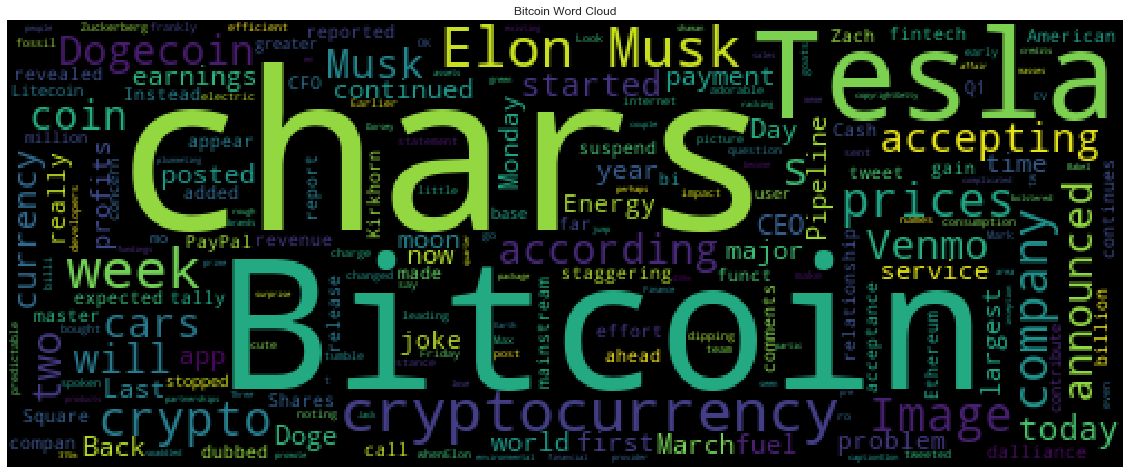

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
wordcloud(btc['text'].str.cat(), "Bitcoin Word Cloud")

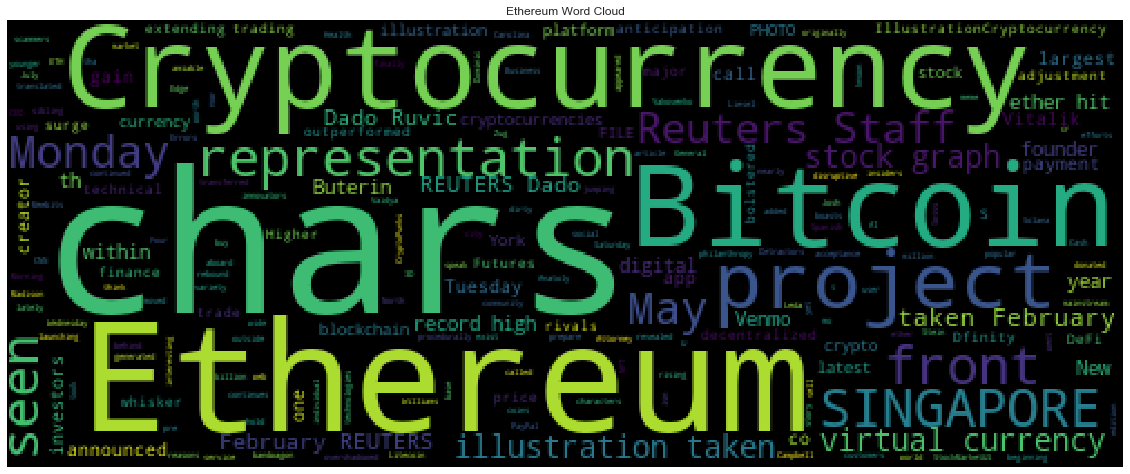

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!


wordcloud(eth['text'].str.cat(), "Ethereum Word Cloud")


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [33]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!


all_btc_text = btc['text'].str.cat()
all_btc_text

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars]Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumptio

In [34]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [35]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc,style='ent')

In [36]:
# List all Entities
# YOUR CODE HERE!


for entity in doc.ents:
    print(entity.text, entity.label_)

Just weeks DATE
Tesla ORG
Bitcoin GPE
Elon Musk ORG
Tesla ORDINAL
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
Q1 2021 DATE
3.36 MONEY
bitcoin GPE
CFO ORG
master of coin” Zach Kirkhorn WORK_OF_ART
Monday DATE
PayPal PERSON
Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Venmo ORG
70 million CARDINAL
Tesla

 

 Tesla DATE
Elon Musk PERSON
Friday DATE
Bitcoin GPE
below $50,000 MONEY
first ORDINAL
early March DATE
Bitcoin GPE
Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin GPE
Musk ORG
Dogecoin PERSON
Elon Musk ORG
March DATE
Musk ORG
Tesla ORDINAL
Bitcoin GPE
Earlier this year DATE
EV ORG
1.5 MONEY
Musk ORG
Tesla ORDINAL
Tesla ORDINAL
first quarter DATE
$438m MONEY
£315m MONEY
Bitcoin GPE
Elon Musk ORG
Bitcoin GPE
couple of days DATE
Bitcoin GPE
Jack Dorsey PERSON
chars]Three years DATE
Babel Finance PERSON
Monday DATE
Tuesday DATE
Venmo ORG
CNN ORG
Business)Bitcoin PRODUCT
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
more than 5,500 miles QUANTITY

---

### Ethereum NER

In [37]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!


all_eth_text = eth['text'].str.cat()
all_eth_text

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars]Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars]Venmo is jumping aboard the cryptocurrency bandwagon.\xa0\r\nThe social payment service announced on Tuesday that its customers can now buy, hold, and sell cryptocurrencies within the Venmo app.\xa0\r\nFour cr… [+1524 chars]Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variet

In [38]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data['title'] = "Ethereum NER"


In [39]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(eth_doc, style='ent')


In [40]:
# List all Entities
# YOUR CODE HERE!


for entity in eth_doc.ents:
    print(entity.text, entity.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
$1.5 billion MONEY
one CARDINAL
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Leda Health PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal PERSON
Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Venmo ORG
70 million CARDINAL
Tuesday DATE
Venmo ORG
Anatoly Yakovenko PERSON
CNN ORG
Business)Bitcoin PRODUCT
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
Reuters ORG
February 19, 2021 DATE
REUTERS/Dado Ruvic/Illustration ORG
February 19, 2021 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Zug GPE
Dominic Williams PERSON
Dfinity ORG
Monday DATE
Morning TIME
U.S. GPE
Monday DATE
Spanish NORP
AI GPE
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
Dow Jones Indices ORG
bitcoin GPE
Wall Stre ORG
February 19, 2021

---